## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   0.417726   296.967596  0.694290  7.304612  1.431527
1  39.851992  1541.669462  0.839376  9.895905  1.565236
2  66.124480  1309.678389  0.634232  7.794281  1.570380
3   0.830091  1404.639865  0.626856  3.204604  1.589718
4  83.942695   489.711020  0.142633  6.565685  0.687815


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9969726	total: 67.2ms	remaining: 1m 7s
1:	learn: 0.9885570	total: 67.8ms	remaining: 33.8s
2:	learn: 0.9827853	total: 68.2ms	remaining: 22.7s
3:	learn: 0.9752092	total: 68.8ms	remaining: 17.1s
4:	learn: 0.9645581	total: 69.3ms	remaining: 13.8s
5:	learn: 0.9559022	total: 69.9ms	remaining: 11.6s
6:	learn: 0.9481380	total: 70.4ms	remaining: 9.99s
7:	learn: 0.9388121	total: 70.9ms	remaining: 8.79s
8:	learn: 0.9312927	total: 71.4ms	remaining: 7.86s
9:	learn: 0.9228439	total: 71.8ms	remaining: 7.11s
10:	learn: 0.9163433	total: 72.3ms	remaining: 6.5s
11:	learn: 0.9077884	total: 72.9ms	remaining: 6s
12:	learn: 0.8993084	total: 73.6ms	remaining: 5.59s
13:	learn: 0.8888656	total: 74ms	remaining: 5.21s
14:	learn: 0.8803116	total: 74.5ms	remaining: 4.89s
15:	learn: 0.8726372	total: 74.9ms	remaining: 4.6s
16:	learn: 0.8629406	total: 75.2ms	remaining: 4.35s
17:	learn: 0.8546756	total: 75.7ms	remaining: 4.13s
18:	learn: 0.8506971	total: 76.1ms	remaining: 3.93s

116:	learn: 0.4265565	total: 119ms	remaining: 895ms
117:	learn: 0.4242273	total: 119ms	remaining: 891ms
118:	learn: 0.4208511	total: 120ms	remaining: 886ms
119:	learn: 0.4183724	total: 120ms	remaining: 882ms
120:	learn: 0.4154512	total: 121ms	remaining: 877ms
121:	learn: 0.4124712	total: 121ms	remaining: 871ms
122:	learn: 0.4106697	total: 122ms	remaining: 866ms
123:	learn: 0.4080198	total: 122ms	remaining: 863ms
124:	learn: 0.4055387	total: 123ms	remaining: 858ms
125:	learn: 0.4029346	total: 123ms	remaining: 853ms
126:	learn: 0.4002699	total: 123ms	remaining: 848ms
127:	learn: 0.3979745	total: 124ms	remaining: 843ms
128:	learn: 0.3949632	total: 124ms	remaining: 839ms
129:	learn: 0.3927616	total: 125ms	remaining: 834ms
130:	learn: 0.3908320	total: 125ms	remaining: 831ms
131:	learn: 0.3879115	total: 126ms	remaining: 826ms
132:	learn: 0.3855862	total: 126ms	remaining: 822ms
133:	learn: 0.3833363	total: 127ms	remaining: 818ms
134:	learn: 0.3809664	total: 127ms	remaining: 812ms
135:	learn: 

271:	learn: 0.1916191	total: 186ms	remaining: 497ms
272:	learn: 0.1906290	total: 186ms	remaining: 496ms
273:	learn: 0.1897449	total: 187ms	remaining: 495ms
274:	learn: 0.1889467	total: 187ms	remaining: 493ms
275:	learn: 0.1881576	total: 188ms	remaining: 492ms
276:	learn: 0.1874605	total: 188ms	remaining: 491ms
277:	learn: 0.1866714	total: 188ms	remaining: 489ms
278:	learn: 0.1857580	total: 189ms	remaining: 488ms
279:	learn: 0.1848956	total: 189ms	remaining: 487ms
280:	learn: 0.1842240	total: 190ms	remaining: 486ms
281:	learn: 0.1833625	total: 190ms	remaining: 484ms
282:	learn: 0.1826423	total: 191ms	remaining: 483ms
283:	learn: 0.1820619	total: 191ms	remaining: 482ms
284:	learn: 0.1812602	total: 192ms	remaining: 481ms
285:	learn: 0.1805582	total: 192ms	remaining: 480ms
286:	learn: 0.1799713	total: 193ms	remaining: 478ms
287:	learn: 0.1793326	total: 193ms	remaining: 477ms
288:	learn: 0.1781884	total: 194ms	remaining: 476ms
289:	learn: 0.1772702	total: 194ms	remaining: 475ms
290:	learn: 

535:	learn: 0.0924997	total: 300ms	remaining: 260ms
536:	learn: 0.0924481	total: 300ms	remaining: 259ms
537:	learn: 0.0921582	total: 301ms	remaining: 258ms
538:	learn: 0.0921071	total: 301ms	remaining: 258ms
539:	learn: 0.0917487	total: 302ms	remaining: 257ms
540:	learn: 0.0915932	total: 302ms	remaining: 256ms
541:	learn: 0.0915036	total: 303ms	remaining: 256ms
542:	learn: 0.0912076	total: 303ms	remaining: 255ms
543:	learn: 0.0910551	total: 304ms	remaining: 255ms
544:	learn: 0.0907096	total: 304ms	remaining: 254ms
545:	learn: 0.0905608	total: 305ms	remaining: 253ms
546:	learn: 0.0902228	total: 306ms	remaining: 253ms
547:	learn: 0.0900955	total: 306ms	remaining: 253ms
548:	learn: 0.0897642	total: 307ms	remaining: 252ms
549:	learn: 0.0897111	total: 307ms	remaining: 251ms
550:	learn: 0.0893863	total: 308ms	remaining: 251ms
551:	learn: 0.0891354	total: 308ms	remaining: 250ms
552:	learn: 0.0888892	total: 308ms	remaining: 249ms
553:	learn: 0.0884618	total: 309ms	remaining: 249ms
554:	learn: 

696:	learn: 0.0592247	total: 367ms	remaining: 160ms
697:	learn: 0.0590421	total: 368ms	remaining: 159ms
698:	learn: 0.0589688	total: 368ms	remaining: 158ms
699:	learn: 0.0587904	total: 368ms	remaining: 158ms
700:	learn: 0.0587181	total: 369ms	remaining: 157ms
701:	learn: 0.0585411	total: 369ms	remaining: 157ms
702:	learn: 0.0584567	total: 370ms	remaining: 156ms
703:	learn: 0.0583143	total: 370ms	remaining: 156ms
704:	learn: 0.0582433	total: 371ms	remaining: 155ms
705:	learn: 0.0580716	total: 371ms	remaining: 154ms
706:	learn: 0.0579811	total: 371ms	remaining: 154ms
707:	learn: 0.0578129	total: 372ms	remaining: 153ms
708:	learn: 0.0577434	total: 372ms	remaining: 153ms
709:	learn: 0.0575753	total: 373ms	remaining: 152ms
710:	learn: 0.0574365	total: 373ms	remaining: 152ms
711:	learn: 0.0573738	total: 373ms	remaining: 151ms
712:	learn: 0.0573052	total: 375ms	remaining: 151ms
713:	learn: 0.0572175	total: 375ms	remaining: 150ms
714:	learn: 0.0570809	total: 375ms	remaining: 150ms
715:	learn: 

960:	learn: 0.0333900	total: 481ms	remaining: 19.5ms
961:	learn: 0.0332512	total: 482ms	remaining: 19ms
962:	learn: 0.0331329	total: 482ms	remaining: 18.5ms
963:	learn: 0.0330554	total: 483ms	remaining: 18ms
964:	learn: 0.0329807	total: 483ms	remaining: 17.5ms
965:	learn: 0.0328907	total: 483ms	remaining: 17ms
966:	learn: 0.0327414	total: 484ms	remaining: 16.5ms
967:	learn: 0.0326508	total: 484ms	remaining: 16ms
968:	learn: 0.0326139	total: 485ms	remaining: 15.5ms
969:	learn: 0.0325367	total: 485ms	remaining: 15ms
970:	learn: 0.0324053	total: 486ms	remaining: 14.5ms
971:	learn: 0.0323316	total: 486ms	remaining: 14ms
972:	learn: 0.0322276	total: 486ms	remaining: 13.5ms
973:	learn: 0.0321853	total: 487ms	remaining: 13ms
974:	learn: 0.0320566	total: 487ms	remaining: 12.5ms
975:	learn: 0.0320152	total: 488ms	remaining: 12ms
976:	learn: 0.0318890	total: 488ms	remaining: 11.5ms
977:	learn: 0.0317875	total: 489ms	remaining: 11ms
978:	learn: 0.0317497	total: 489ms	remaining: 10.5ms
979:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


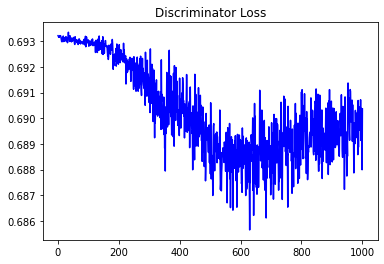

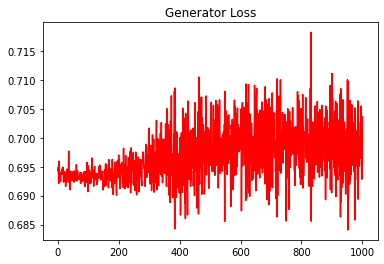

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2879347247455112


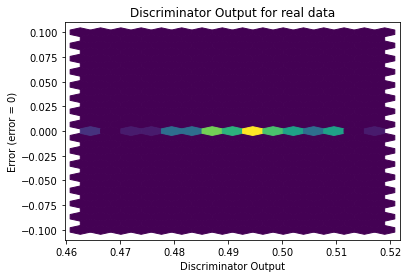

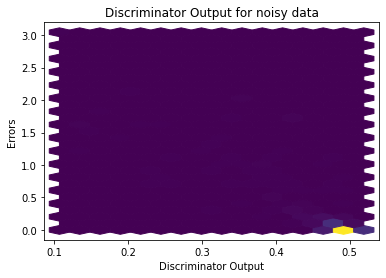

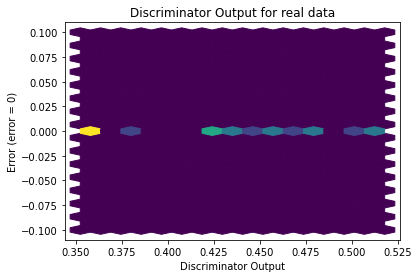

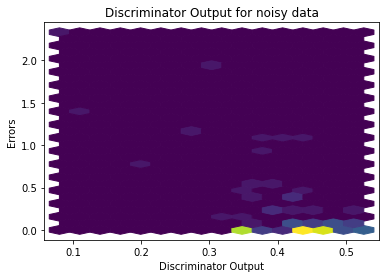

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1974]], requires_grad=True)
